In [134]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy import misc
from IPython.display import Image
import glob
from os.path import splitext, basename

ims = glob.glob('/Users/alexhall/Documents/Coursework/computerVision/finalProject/ims/*.jpg')

In [135]:
def get_color_hist(im, bins):
    COLORS = {'red':0, 'green':1, 'blue':2}
    histogram = {}
    for key in COLORS:
        histogram[key] = np.histogram(im[:,:, COLORS[key]], bins)
    return histogram

In [136]:
#returns a list of subimages in 'reading order' Top-Bottom, left-right
def get_im_parts(im, vcells, hcells):
    parts = np.array_split(im, vcells, 0)
    cells = []
    for p in parts:
        c = np.array_split(p, hcells, 1)
        cells += c
    
    return cells

In [137]:
def get_all_sub_hists(im_grid_cells):
    hists = []
    for sub_im in im_grid_cells:
        this_hist = get_color_hist(sub_im, 2)
        for color in COLORS:
            hists.append(this_hist[color][0]) #0th element is the number of elements in bin.
        
    return np.hstack(hists)

[10305  2394  8822  3877  9409  3290 11352  1347  9016  3683  7316  5383
 11226  1320  9279  3267  7759  4787 11290  1256  5224  7322  3578  8968]


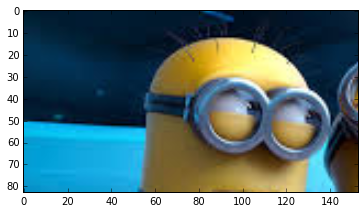

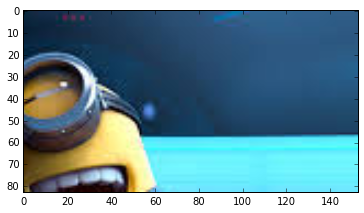

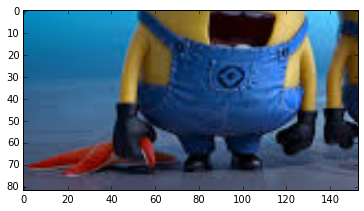

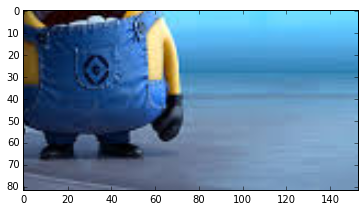

In [158]:


for im in ims:
    file = splitext(basename(im))[0] #remove file extension
    folder = im.split('/')[-2]
    img = misc.imread(im)
    cell = get_im_parts(img, 2, 2)
    output = str(get_all_sub_hists(cell))
    print(output)
    for x in cell:
        plt.imshow(x)
        plt.show()
    #hist = get_color_hist(img, 2)
    #print(hist)